# Visualising animation and interactivity

This notebook explores the use of time-transition animation and streamgraphs.

In [1]:
install.packages("tweenr")
# install.packages("gganimate")
library(devtools)
devtools::install_github("dgrtwo/gganimate")
devtools::install_github("hrbrmstr/streamgraph")

package 'tweenr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tweenr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lukeh\anaconda3\envs\Visdata\Lib\R\library\00LOCK\tweenr\libs\x64\tweenr.dll to C:\Users\lukeh\anaconda3\envs\Visdata\Lib\R\library\tweenr\libs\x64\tweenr.dll: Permission denied"
Warning message:
"restored 'tweenr'"



The downloaded binary packages are in
	C:\Users\lukeh\AppData\Local\Temp\RtmpIxt91W\downloaded_packages


Loading required package: usethis

Skipping install of 'gganimate' from a github remote, the SHA1 (7cd46dc2) has not changed since last install.
  Use `force = TRUE` to force installation

Skipping install of 'streamgraph' from a github remote, the SHA1 (76f7173e) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(gganimate)
library(streamgraph)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.1      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.3.0      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



### We will use:
- Handling multiple dimensions over time
    - Stream Graph
    - Animation

In [3]:
mydata = file.path("C:","Users","lukeh","Documents","College","4th-Year","Visualising_Data")
datapath = file.path(mydata,"seaice.csv")
df <- read.csv(datapath)
str(df)

'data.frame':	26354 obs. of  7 variables:
 $ Year       : int  1978 1978 1978 1978 1978 1978 1978 1978 1978 1978 ...
 $ Month      : int  10 10 10 11 11 11 11 11 11 11 ...
 $ Day        : int  26 28 30 1 3 5 7 9 11 13 ...
 $ Extent     : num  10.2 10.4 10.6 10.7 10.8 ...
 $ Missing    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Source.Data: chr  " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978102"| __truncated__ " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978102"| __truncated__ " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978103"| __truncated__ " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978110"| __truncated__ ...
 $ hemisphere : chr  "north" "north" "north" "north" ...


In [4]:
df <- subset(df, select= (-c(Source.Data)))

In [5]:
head(df)

,Year,Month,Day,Extent,Missing,hemisphere
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1978,10,26,10.231,0,north
2,1978,10,28,10.420,0,north
3,1978,10,30,10.557,0,north
4,1978,11,1,10.670,0,north
5,1978,11,3,10.777,0,north
6,1978,11,5,10.968,0,north


In [6]:
df <- 
df %>%
group_by(Year, Month, hemisphere) %>%
summarise_at (vars(Extent), list(Monthly_Extent=sum))
dfice <- df

In [7]:
head(dfice)

Year,Month,hemisphere,Monthly_Extent
<int>,<int>,<chr>,<dbl>
1978,10,north,31.208
1978,10,south,53.097
1978,11,north,174.677
1978,11,south,238.446
1978,12,north,218.673
1978,12,south,166.324


In [8]:
unique(df$hemisphere)
unique(df$Year)
unique(df$Month)

[1] "north" "south"

[1] 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
[16] 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
[31] 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

[1] 10 11 12  1  2  3  4  5  6  7  8  9

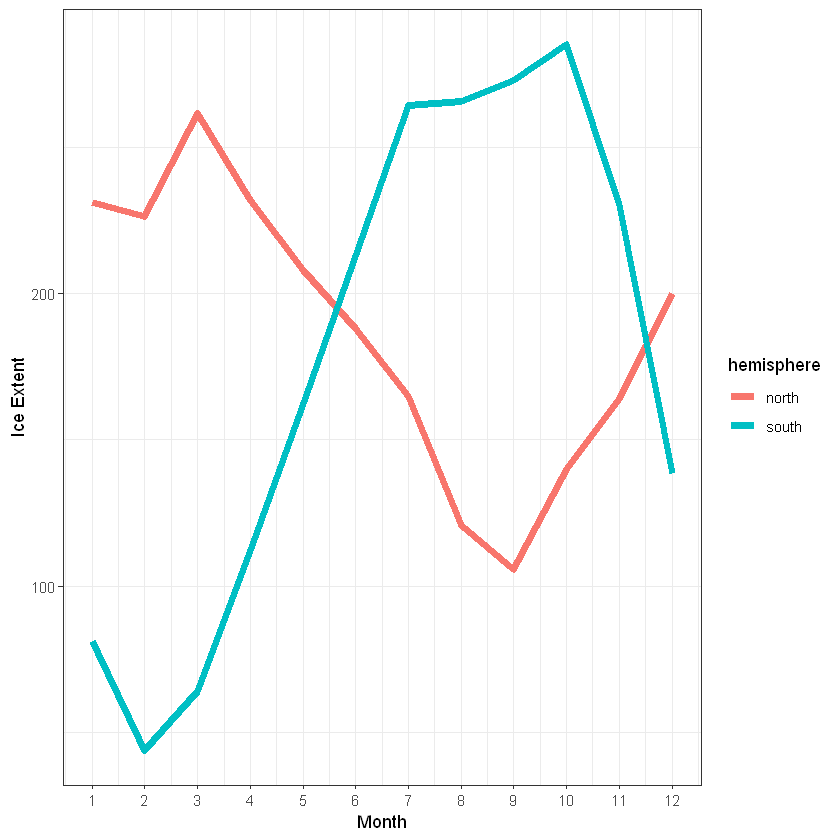

In [9]:
p <- ggplot(dfice[dfice$Year==1979,], aes(x=Month, y= Monthly_Extent, color=hemisphere)) + geom_line(linewidth=2) + theme_bw() + 
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) +
labs(x = "Month", y = "Ice Extent")
p


In [10]:
head(dfice)

Year,Month,hemisphere,Monthly_Extent
<int>,<int>,<chr>,<dbl>
1978,10,north,31.208
1978,10,south,53.097
1978,11,north,174.677
1978,11,south,238.446
1978,12,north,218.673
1978,12,south,166.324


In [11]:
colnames(dfice)
unique(df$hemisphere)

[1] "Year"           "Month"          "hemisphere"     "Monthly_Extent"

[1] "north" "south"

In [12]:
head(dfice[dfice$Year==1980,],2)

Year,Month,hemisphere,Monthly_Extent
<int>,<int>,<chr>,<dbl>
1980,1,north,237.790
1980,1,south,72.992


In [22]:
  install.packages("gifski")
  library("gifski")

package 'gifski' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lukeh\AppData\Local\Temp\RtmpIxt91W\downloaded_packages


In [23]:
options(repr.plot.width=12,repr.plot.height=6)
ggplot(dfice, aes(x = Month, y = Monthly_Extent,  color=hemisphere, size=2))+theme_bw() +
 geom_point(aes(size=2))+
 guides(size = FALSE)+  
 labs(subtitle = 'Year: {frame_time}',
       title = 'Sea Ice Extents',
       x = 'Month', y = 'Ice Extent (10^6 sq km)',  fill='hemisphere')+
  transition_time(Year) +
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) 

anim_save("GP5.gif", animation = last_animation(), renderer = gifski_renderer())
display_gif <- function(raw){
    contents <- base64enc::base64encode(raw)
    tag <- '<img src="data:image/gif;base64,%s">'
    IRdisplay::display_html(sprintf(tag, contents))
}
display_gif("GP5.gif")

Warning message:
"file_renderer failed to copy frames to the destination directory"
ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'plotly'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_han

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


# Interactive stream graphs

 R has a tool and a htmlwidget that allows interactive use of streamgraphs using the babynames dataset.
 
 Importantly, this dataset has zero or one entries per name per year, giving the number of children registered with that name.  Streamgraph uses the time (year) on the x-axis, the count (n) on the y-axis (i.e. width, or wt) and uses stacked area colours to show the names.  The filter allows the programmer to specify a range of, in this case, names.  A pop-up box allows the user to select one of the names in the range and this name is highlighted.

In [14]:
#install.packages("babynames")
library(babynames)

ERROR: Error in library(babynames): there is no package called 'babynames'


In [15]:
str(babynames)

ERROR: Error in str(babynames): object 'babynames' not found


In [16]:
babynames %>%
  filter(grepl("^Pat", name)) %>%
  group_by(year, name) %>%
  tally(wt=n) %>%
  streamgraph("name", "n", "year", offset="zero", interpolate="linear") %>%
  sg_legend(show=TRUE, label="Pat - names: ")

ERROR: Error in filter(., grepl("^Pat", name)): object 'babynames' not found


### Using ggstream

ggstream is a package that allows the user to do static stream charts, which are easier to interpret when there is no possibility for interacting.  The following charts took lists of popular names from 1950, 1980 and 2023.  In each case, the graph is followed by one generated through streamgraph.

In [20]:
install.package(babynames)

ERROR: Error in install.package(babynames): could not find function "install.package"


In [17]:
list1950 <- c("Linda","James","Mary","Robert","Patricia","John","Barbara","Michael","Susan","David")

names1950s <- babynames[babynames$name %in% list1950,]
names1950s <-names1950s %>%
group_by(name,year) %>%
summarise_at(vars(n), list(total=sum))
#head(names1950s)
ggplot (names1950s, aes(x=year, y=total, fill=name)) + geom_stream()

ERROR: Error in eval(expr, envir, enclos): object 'babynames' not found


In [18]:

names1950s%>% 
  streamgraph(key="name", value="total", date="year") %>%
  sg_fill_brewer("PuOr")


ERROR: Error in data.frame(data): object 'names1950s' not found


In [ ]:
list1990 <- c("Michael", "Jessica", "Christopher", "Ashley", "Matthew", "Emily", "Joshua", "Sarah", "Jacob", "Samantha")
names1990s <- babynames[babynames$name %in% list1990,]
names1990s <-names1990s %>%
group_by(name,year) %>%
summarise_at(vars(n), list(total=sum))
#head(names1990s)
names1990s%>% 
  streamgraph(key="name", value="total", date="year") %>%
  sg_fill_brewer("PuOr")

In [ ]:
ggplot (names1990s, aes(x=year, y=total, fill=name)) + geom_stream()

In [ ]:

list2023 <- c("Luxury", "Maeve", "Aurelia", "Isla", "Luna", "Kylian", "Theodore", "Atticus", "Felix", "Silas")
names2023 <- babynames[babynames$name %in% list2023,]
names2023 <-names2023 %>%
group_by(name,year) %>%
summarise_at(vars(n), list(total=sum))
#head(names2023)
ggplot (names2023, aes(x=year, y=total, fill=name)) + geom_stream()

In [ ]:
names2023%>% 
  streamgraph(key="name", value="total", date="year") %>%
  sg_fill_brewer("PuOr")